# Numeros aleatorios

## ¿Una computadora realmente puede generar números aleatorios?

Estrictamente, **NO**, una computadora no puede generar cosas aleatorias pues está programada para hacer cosas que nosotros le indiquemos. Puede guardar valores de cosas aleatorias (I.E. valor de una cosa de la memoria, numero de clics dados por última vez, numero de veces que apretamos la tecla "enter" la última vez que la encendimos), pero **no puede generarlos**

## ¿Qué es lo más cercano a un número aleatorio que puede darme la computadora?

Existen diversas maneras algorítmicas de generar **números casi aleatorios (*números pseudoaleatorios*)** que son muy parecidos a un número aleatorio.

## ¿Qué es un número pseudoaleatorio?

Es un número entero $n$ generado por un algoritmo bien definido tal que $0 \leq n \leq 2^{64}-1$ y además que tiene probabilidad uniforme, es decir, $\forall i \in [0,2^{64}-1] \cap \mathbb{Z} \quad \mathbb{P}(n=i) = 2^{-64}$ 

## ¿Vamos a ver algoritmos para generar números pseudoaleatorios?

**No**, los algoritmos para los números pseudoaleatorios no son tan sencillos y requieren saber *teoría de números analítica* (Divisibilidad, números primos, etc.) 

## Si yo quiero, en lugar de un entero, un real aleatorio (o **variable**) que siga una **Distribución de probabilidad**, ¿Cómo le hago?

En probabilidad y estadística, se estudian maneras de convertir un entero aleatorio en un real con una distribución dada. Esa área se le llama **simulación estocástica** o **métodos de Monte Carlo**

## ¿Vamos a estudiar esos métodos?

**NO**, son métodos muy complejos. Nosotros simplemente vamos a utilizar las funciones de los lenguajes que ya utilizan esos métodos para obtener muestras de variables aleatorias que sigan una distrución.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [22]:
# flotante aleatorio entre 0 y 1
np.random.rand()

0.22387307356346242

## ¿Cómo mido cuales flotantes son más probables de obtener?

Conocer la probabilidad que tiene el número aleatorio de estar en un intervalo es conocer su **Distribución**. Para conocer exactamente la distribución, tendría que generar **infitos números**. No se puede, por lo que usamos una muestra finita y hacemos un **histograma**

## ¿Qué es un histograma?

Dividimos el dominio de la variable en $n_{bins}$ sub intervalos y  contamos cuantos valores de la muestra aleatoria hay en cada intervalo.

In [38]:
aleatorios = [np.random.rand() for i in range(10**4)]

In [41]:
# equivalente, pero regresa un np.array
aleatorios2 = np.random.rand(10**4)

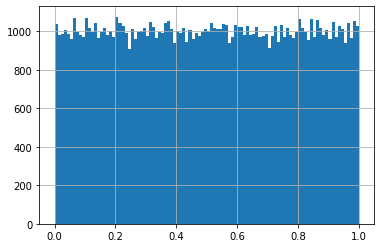

In [45]:
fig = plt.figure(figsize=(6,4))
plt.hist(aleatorios,bins=100)
plt.grid()
plt.show()

## ¿Cuál es el tamaño de cada cajita?

Si el dominio de la variable es $[a,b]$, la longitud $l$ de cada caja del histograma es

$$
l = \frac{b-a}{n_{bins}}
$$

Si los números tiene la misma probabilidad de estar en cualquier lugar del intervalo (0,1), decimos que tienen **probabilidad uniforme** o **Distribución uniforme**

## ¿Cómo genero números con otra distribución?

Otra distribución famosa es la **Gaussiana** o **normal**

In [46]:
gaussianos = np.random.randn(10**4)

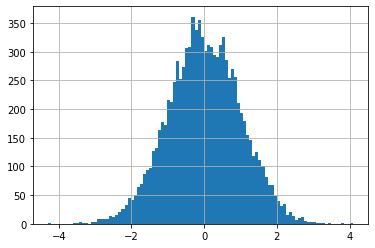

In [50]:
fig = plt.figure(figsize=(6,4))
plt.hist(gaussianos,bins=100)
plt.grid()
plt.show()

## ¿Cómo obtengo un elemento aleatorio de una lista?

In [80]:
nombres = ["aldo","leonardo","sebastian","paulina","maria"]
nombreAleatorio = np.random.choice(nombres)
print(nombreAleatorio)

paulina


## ¿Cómo genero un entero aleatorio?

In [97]:
enteroAleatorio = np.random.choice(range(1,6))
print(enteroAleatorio)

5


In [138]:
# otra manera
np.random.randint(1,6)

2

## ¿Cómo genero reales aletorios en cualquier intervalo [c,d]?

\begin{gather}
0 \leq u \leq 1 \quad & \quad d-c \geq 0 \\
\\
0 \leq u \cdot (d-c) \leq (d-c) \\
\\
c \leq c + u \cdot (d-c) \leq d \\
\end{gather}

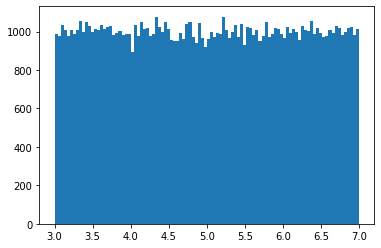

In [144]:
c = 3
d = 7
aleatorios3 = [np.random.rand()*(d-c)+c for i in range(10**5)]
fig = plt.figure()
plt.hist(aleatorios3,bins=100)
plt.show()

## ¿Cómo genero Gaussianos centrados un valor $\mu$ y con un "ancho" $s$?

$s \cdot u + \mu$

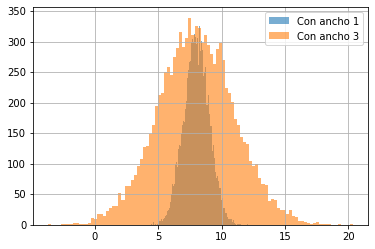

In [150]:
mu = 8
s = 3
aleatorios4 = [np.random.randn() + mu for i in range(10**4)]
aleatorios5 = [s*np.random.randn() + mu for i in range(10**4)]
fig = plt.figure()
plt.hist(aleatorios4,bins=100,label="Con ancho 1",alpha=0.6)
plt.hist(aleatorios5,bins=100,label="Con ancho {0}".format(s),alpha=0.6)
plt.legend()
plt.grid()
plt.show()